In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))

setwd("~/Repositories/AirQualityCOVID/")

In [2]:
suppressMessages(library(repr))
options(repr.plot.width=15,
        repr.plot.height=15,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

# Lockdown dates

In [3]:
periods <- list(
    # Prelockdown
    #pre.lockdown = lubridate::ymd("2020-01-01"),

    # lockdown
    lockdown = lubridate::ymd("2020-03-14"),
    #end.lockdown = ymd_hms("2020-04-28 00:00:00"),

    # poslockdown
    fases = lubridate::ymd("2020-05-01"),
    normalidad = lubridate::ymd("2020-06-21"),

    # New lockdown
    new.lockdown = lubridate::ymd("2020-10-25")#,
    #end.year = lubridate::ymd("2020-11-26")
)

## Process

In [4]:
get.breakpoints <- function(serie, label) {
    a <- strucchange::breakpoints(
        diff ~ date, 
        data = serie, 
        h = 15, 
        breaks = 5
      )
    
    breakpoints <- data.frame("date" = serie[a$breakpoints, "date"],
                              "group"=label
                             )# %>% rename(breaks = date)
}

In [5]:
variable <- "o3"

groups <- read.csv(paste("data/clusters_", 
                         variable, ".csv", sep="")) %>% rename(diff = values)
groups$group <- as.factor(groups$group)
groups$date <- lubridate::ymd(groups$date)

In [6]:
b <- data.frame()

for (gr in levels(groups$group)) {

    data <- groups %>% filter(group == gr)

    b <- rbind(b, get.breakpoints(data, gr))
}

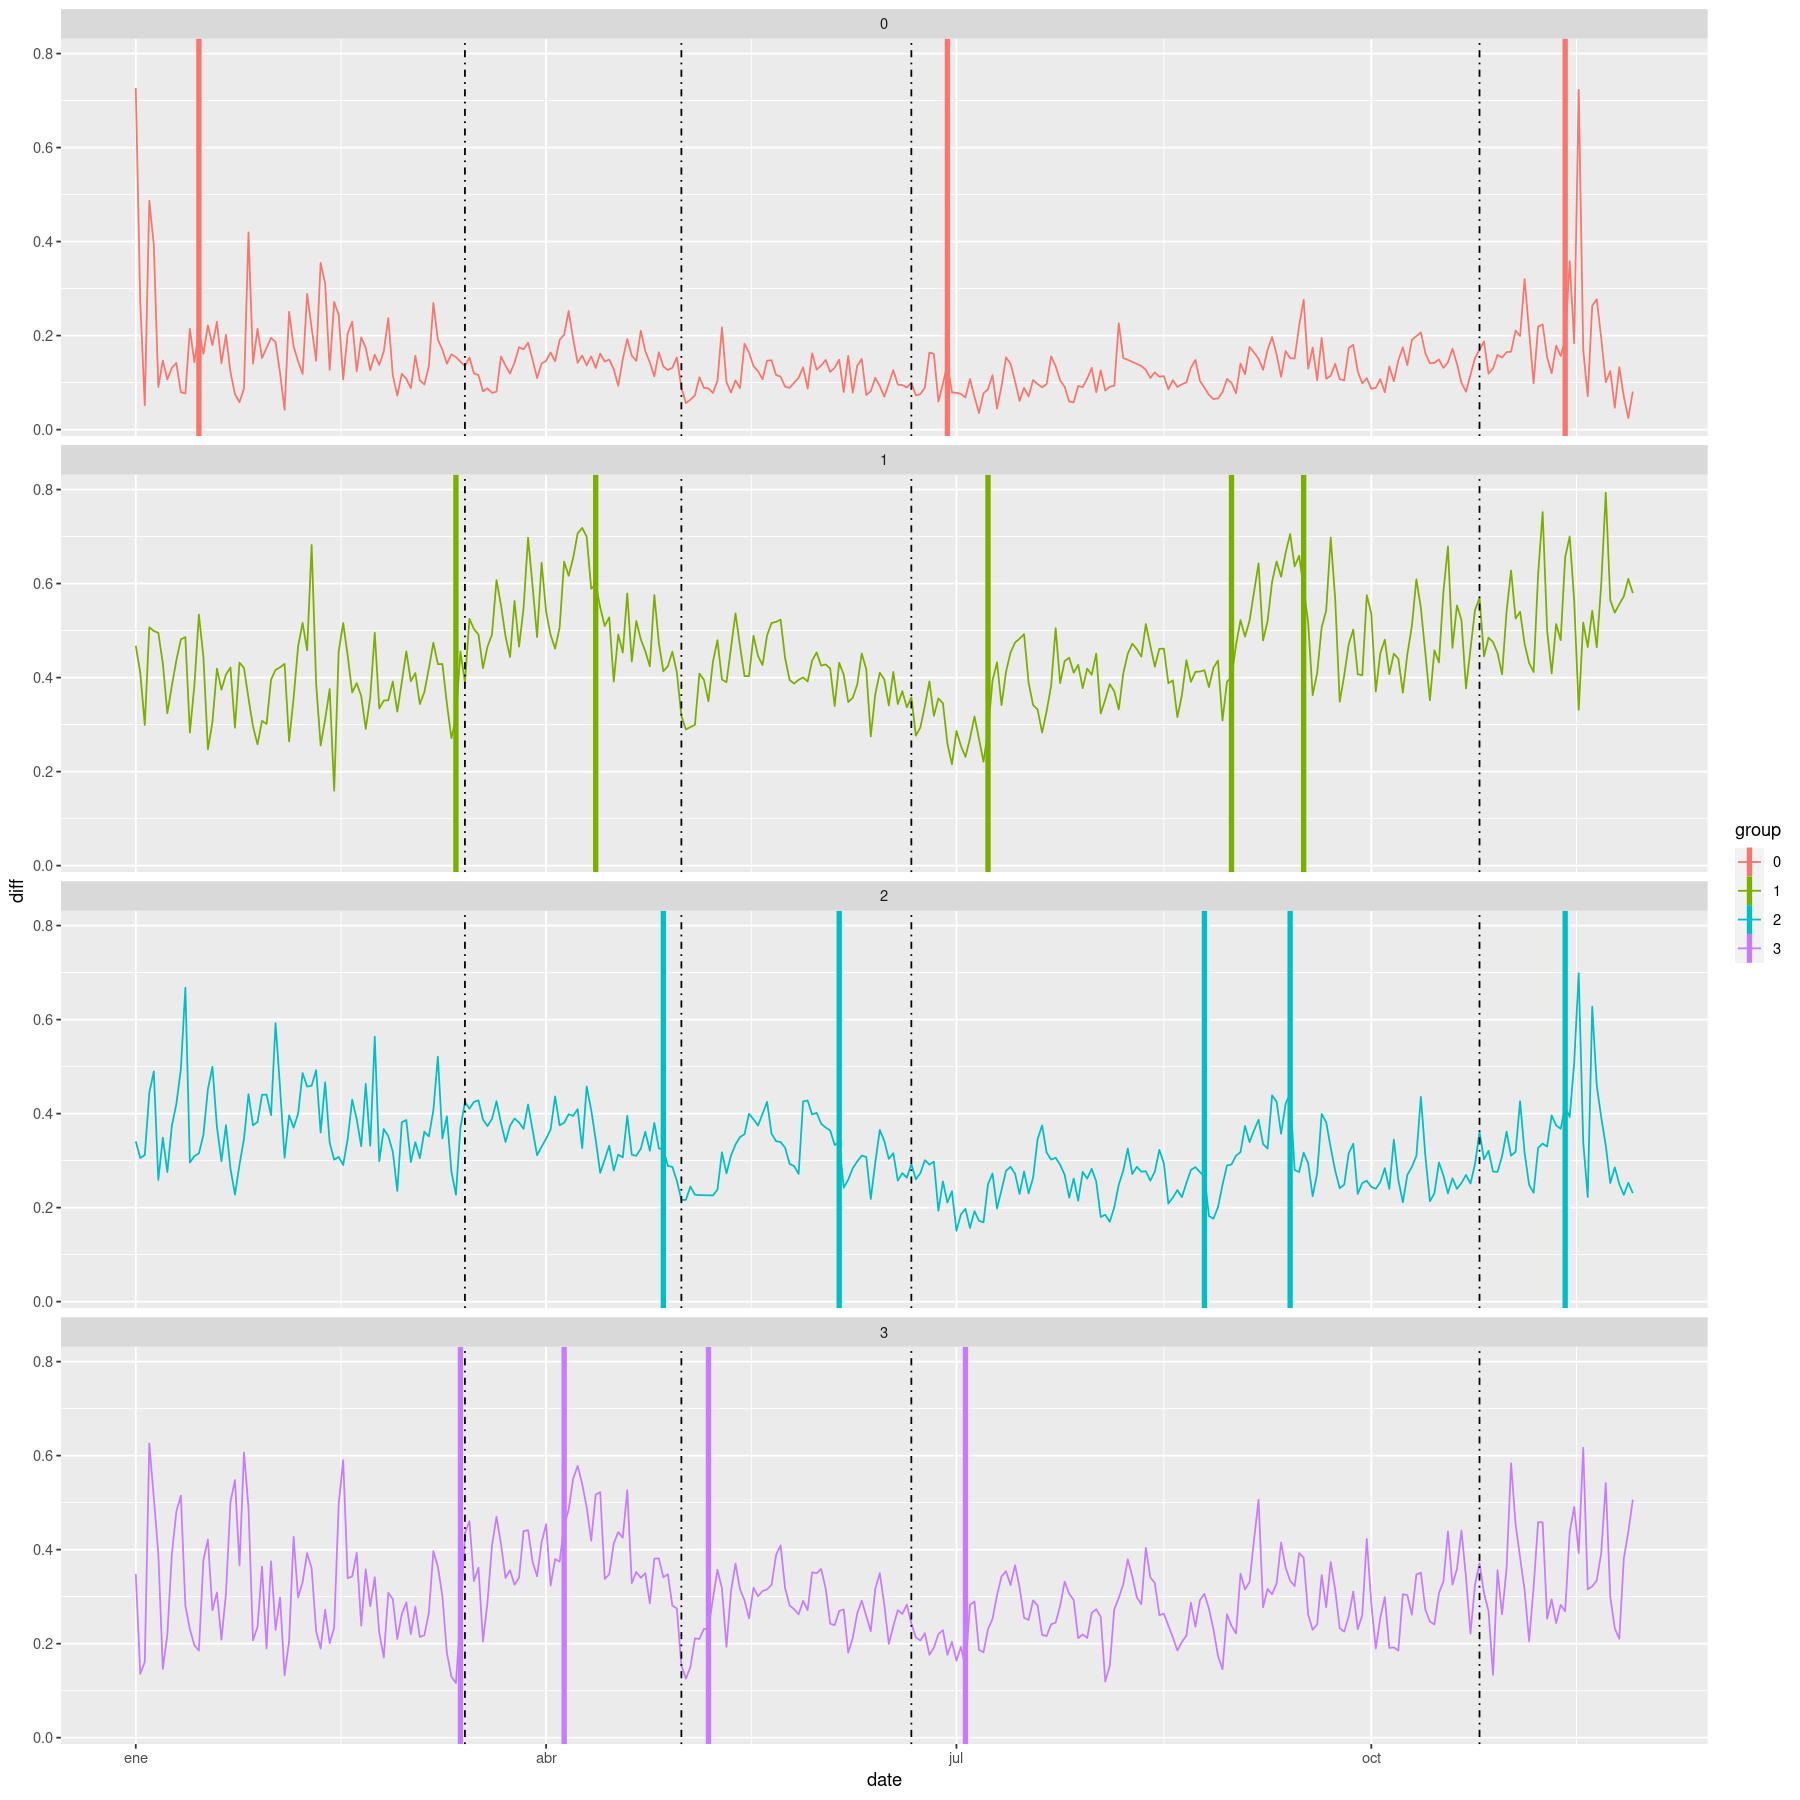

In [7]:
ggplot(data=groups, aes(x=date)) +
    geom_line(aes(y=diff, color=group)) +
    geom_vline(data = b, aes(xintercept = date, color=group), size=1.5)+
    geom_vline(xintercept = unlist(periods), linetype=4, color = "black", size=0.5)+
    facet_wrap(~group, ncol = 1)

In [8]:
ggsave(filename = paste("Plots/breaks_",
                        variable, "_4clusters.png", sep=""),
       plot = last_plot(),
       width=10,
       height=15
      )